In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
#imports the dataset and deletes unneeded columns/rows.
salaries_df = pd.read_csv('C:/Users/predi/Documents/GitHub/DSC530 Assignments/salaries.csv')
salaries_df.drop(salaries_df.query(" `employment_type`!='FT' ").index, inplace=True)
salaries_df.drop (columns = ['salary', 'salary_currency', 'employee_residence','employment_type'], inplace=True)
#salaries_df.drop(salaries_df.query(" `company_location`!='US' ").index, inplace=True)


<Axes: xlabel='salary_in_usd', ylabel='Count'>

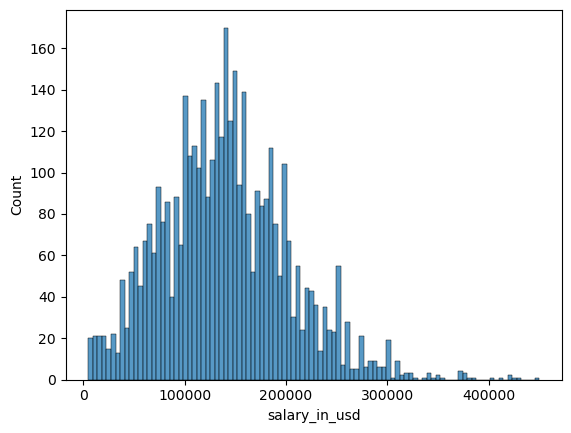

In [3]:
#Creates a histogram for each variable. Uncomment other lines to see histogram for different variables.
sns.histplot(salaries_df['salary_in_usd'], bins=100)
#sns.histplot(salaries_df['work_year'], bins=4)
#sns.histplot(salaries_df['remote_ratio'], bins=3)
#sns.histplot(salaries_df['experience_level'], bins=4)
#sns.histplot(salaries_df['company_size'], bins =3)
#sns.histplot(salaries_df['company_location'])
#sns.histplot(salaries_df['job_title'])

In [4]:
#caculates the Mean, Mode, Spread, and Tails of the various variables.
#Uncomment other lines to see summaries for different variables.
salaries_df['salary_in_usd'].describe()
#salaries_df['work_year'].describe()
#salaries_df['experience_level'].describe()
#salaries_df['remote_ratio'].describe()
#salaries_df['company_size'].describe()
#salaries_df['company_location'].describe()

count      4093.000000
mean     140116.351332
std       62983.078569
min        5132.000000
25%       99050.000000
50%      136000.000000
75%      180000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [33]:
salaries_df['salary_in_usd'].var()
#salaries_df['work_year'].var()
#salaries_df['experience_level'].var()
#salaries_df['remote_ratio'].var()
#salaries_df['company_size'].var()
#salaries_df['company_location'].var()

3966868186.05594

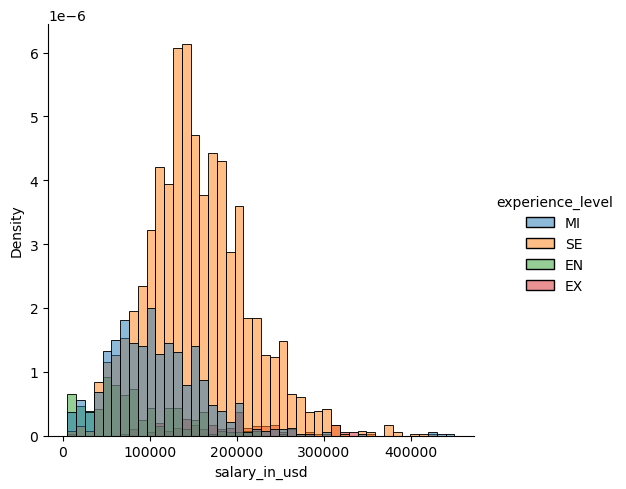

In [5]:
#Plots the PMFs for salery usings the experience level and the remote work percentage.
sns.displot(data=salaries_df, x='salary_in_usd',hue='experience_level',stat="density")
#sns.displot(data=salaries_df, x='salary_in_usd',hue='remote_ratio',stat="density")

In [6]:
#calculates teh mean salary for each expereince level
salaries_df.groupby(['experience_level'])['salary_in_usd'].mean()

experience_level
EN     80192.331250
EX    193833.709677
MI    107652.774566
SE    154698.150144
Name: salary_in_usd, dtype: float64

<Axes: xlabel='salary_in_usd', ylabel='Density'>

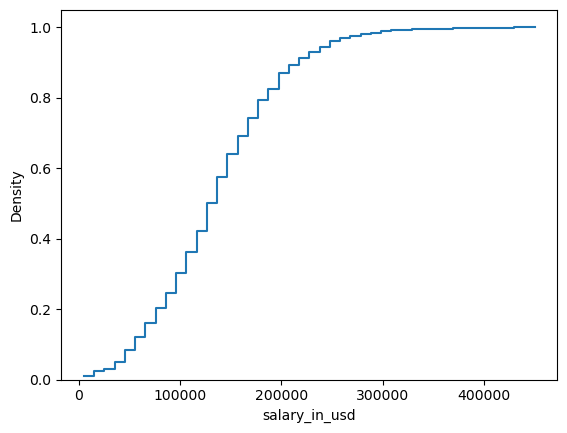

In [7]:
#Creates the CDF for the reported salaries.
sns.histplot(data=salaries_df, x="salary_in_usd", element="step",
             fill=False,cumulative=True, stat="density", common_norm=False,)


Text(0.5, 1.0, 'Normal Distribution Plot')

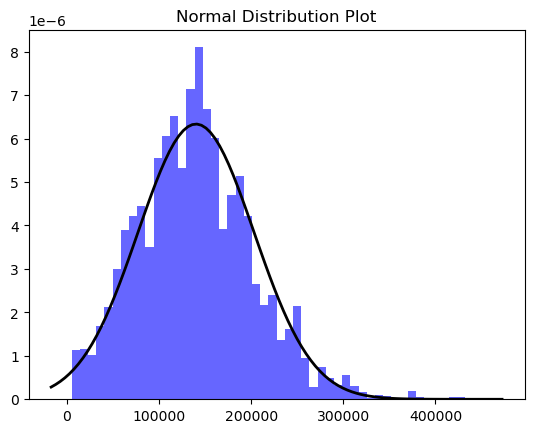

In [8]:
#Plots the salary data with a normal distribution model.
#calculates mean and standard deviation.
data =salaries_df['salary_in_usd']
mu = salaries_df['salary_in_usd'].mean()
std=salaries_df['salary_in_usd'].std()

#plots the salary distribution and creates a model for expected distribution absed on mean and standard deiation.
plt.hist(data, bins=50, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Normal Distribution Plot" 
plt.title(title)


Text(0, 0.5, 'CDF(x)')

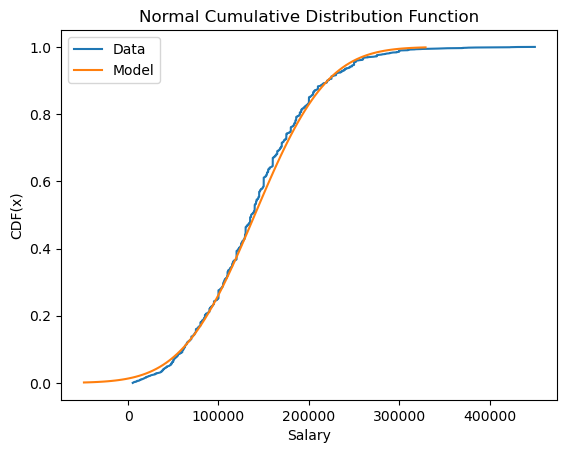

In [9]:
#Plots the analytical distribution for the salary data.
data=salaries_df['salary_in_usd']
x = np.sort(data)
y = 1. * np.arange(len(data)) / (len(data) - 1)
x2 = np.linspace(mu - 3*std, mu + 3*std, 100)
y2 = norm.cdf(x2, mu, std)

plt.plot(x, y, label="Data")
plt.plot(x2, y2, label="Model")
plt.legend(loc="upper left")
plt.plot()
plt.title('Normal Cumulative Distribution Function')
plt.xlabel('Salary')
plt.ylabel('CDF(x)')


<Axes: xlabel='salary_in_usd', ylabel='work_year'>

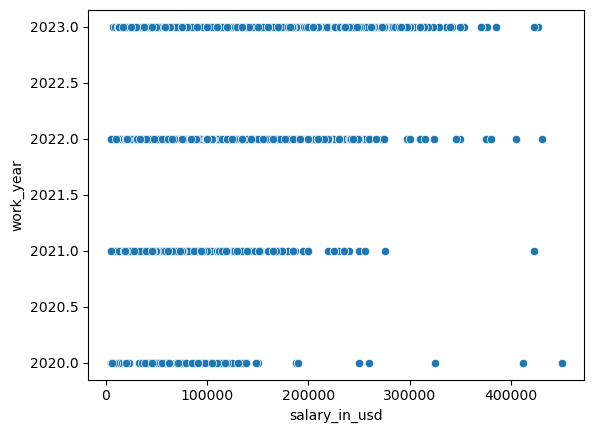

In [10]:
#creates a scatter plot of "salary_in_usd" vs ""
sns.scatterplot(data=salaries_df,x="salary_in_usd", y="work_year")

<Axes: xlabel='salary_in_usd', ylabel='company_size'>

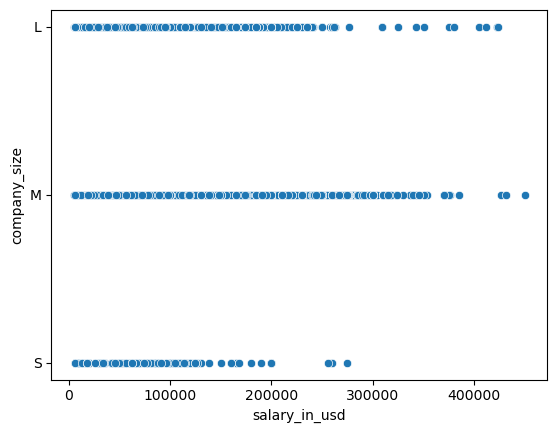

In [11]:
#creates a scatter plot of "salary_in_usd" vs "company_size"
sns.scatterplot(data=salaries_df, x="salary_in_usd", y="company_size")

In [12]:
#encodes the various categorical columns for the regression model
salaries_df['experience_level'] = salaries_df['experience_level'].replace({'EN':1, 'MI':2, 'SE':3, 'EX':4})
salaries_df['remote_ratio'] = salaries_df['remote_ratio'].replace({0:0, 50:0.5, 100:1})
salaries_df['company_size'] = salaries_df['company_size'].replace({'S':1, 'M':2, 'L':3})
le = preprocessing.LabelEncoder()
salaries_df['job_title'] = le.fit_transform(salaries_df['job_title'])
salaries_df['company_location'] = le.fit_transform(salaries_df['company_location'])

In [13]:
salaries_df.corr()

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size
work_year,1.000000,0.181717,-0.023719,0.229923,-0.220775,0.213858,-0.142282
experience_level,0.181717,1.000000,-0.000026,0.427251,-0.032196,0.261841,-0.071258
job_title,-0.023719,-0.000026,1.000000,0.124641,-0.035764,-0.060368,-0.013052
salary_in_usd,0.229923,0.427251,0.124641,1.000000,-0.063465,0.386305,-0.005463
remote_ratio,-0.220775,-0.032196,-0.035764,-0.063465,1.000000,-0.067564,0.030887
company_location,0.213858,0.261841,-0.060368,0.386305,-0.067564,1.000000,-0.032653
company_size,-0.142282,-0.071258,-0.013052,-0.005463,0.030887,-0.032653,1.000000


In [14]:
#hypothesis test - Pearson’s correlation test for salary vs remote ratio
corr=[]
pvalue=[]
for x in range(1000):
    sampled_df = salaries_df.sample(n=2000, random_state=x)
    cr, pv = pearsonr(sampled_df.salary_in_usd, sampled_df.remote_ratio)
    corr.append(cr)
    pvalue.append(pv)
    
min(corr), max(corr), max(pvalue)
    

(-0.12074993902861468, -0.008932860775154792, 0.6897105587956726)

In [15]:
#hypothesis test - Pearson’s correlation test for salary vs experience_level
corr=[]
pvalue=[]
for x in range(1000):
    sampled_df = salaries_df.sample(n=2000, random_state=x)
    cr, pv = pearsonr(sampled_df.salary_in_usd, sampled_df.experience_level)
    corr.append(cr)
    pvalue.append(pv)
    
min(corr), max(corr), max(pvalue)

(0.38586088030572036, 0.4700912819633741, 5.252138788446747e-72)

In [18]:
#splits the data fram into X and y dataframes,then splits them for validating of the models.
y=salaries_df['salary_in_usd']
X = salaries_df.loc[:, salaries_df.columns != 'salary_in_usd']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
X

,work_year,experience_level,job_title,remote_ratio,company_location,company_size
0,2023,2,4,1.0,67,3
1,2023,3,50,0.0,67,2
2,2023,3,50,0.0,67,2
3,2023,3,35,1.0,67,2
4,2023,3,35,1.0,67,2
...,...,...,...,...,...,...
4128,2021,3,52,1.0,67,3
4129,2020,3,50,1.0,67,3
4130,2021,2,89,1.0,67,3
4131,2020,1,50,1.0,67,1


In [19]:
#Creates a linear regression model and calculates the mean absolute error.
lr_model = LinearRegression().fit(train_X, train_y) 
lr_predictions = lr_model.predict(val_X)
print('MAE:', mean_absolute_error(val_y, lr_predictions))
print('R-Squared:', lr_model.score(train_X, train_y))

MAE: 40962.34112890344
R-Squared: 0.297174844696634


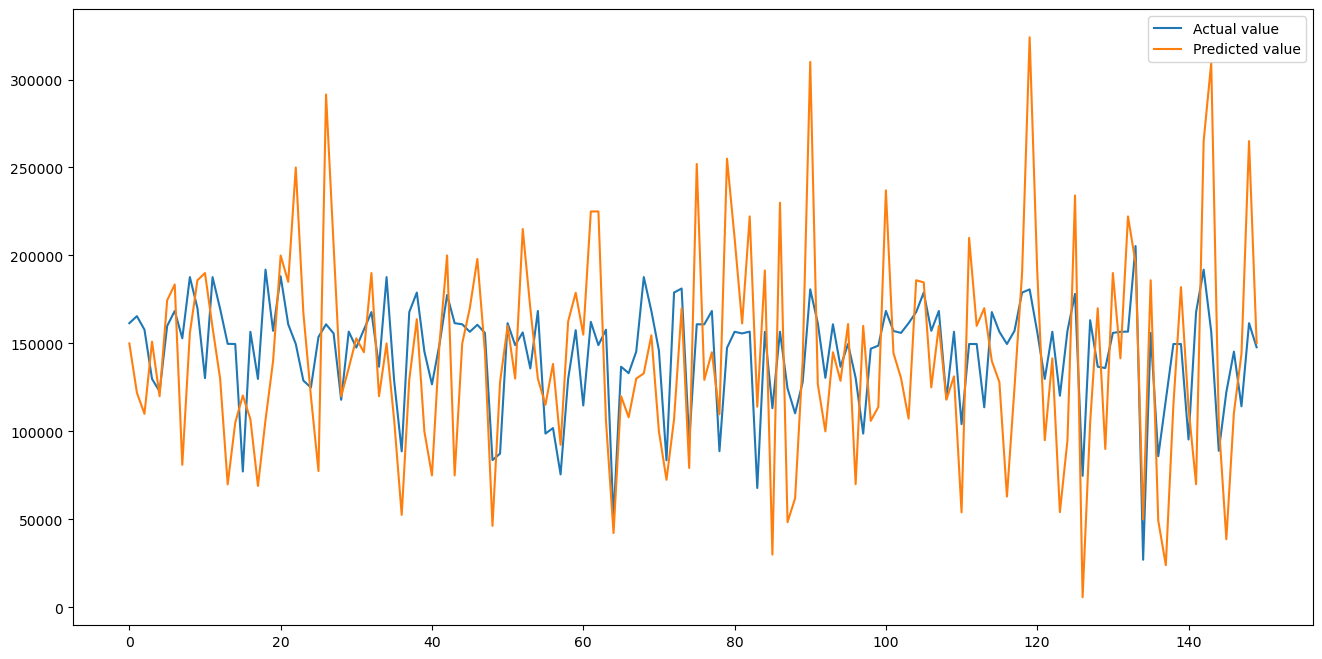

In [20]:
#creates a plot comparing predictions versus actuals.
test = pd.DataFrame({'Predicted value':lr_predictions, 'Actual value':val_y})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:150])
plt.legend(['Actual value','Predicted value'])

In [21]:
#Creates a random forest regression model and calculates the mean absolute error.
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
fm_predictions = forest_model.predict(val_X)
print('MAE:', mean_absolute_error(val_y, fm_predictions))
print('R-Squared:', forest_model.score(train_X, train_y))

MAE: 36727.55598628675
R-Squared: 0.5601203668852214


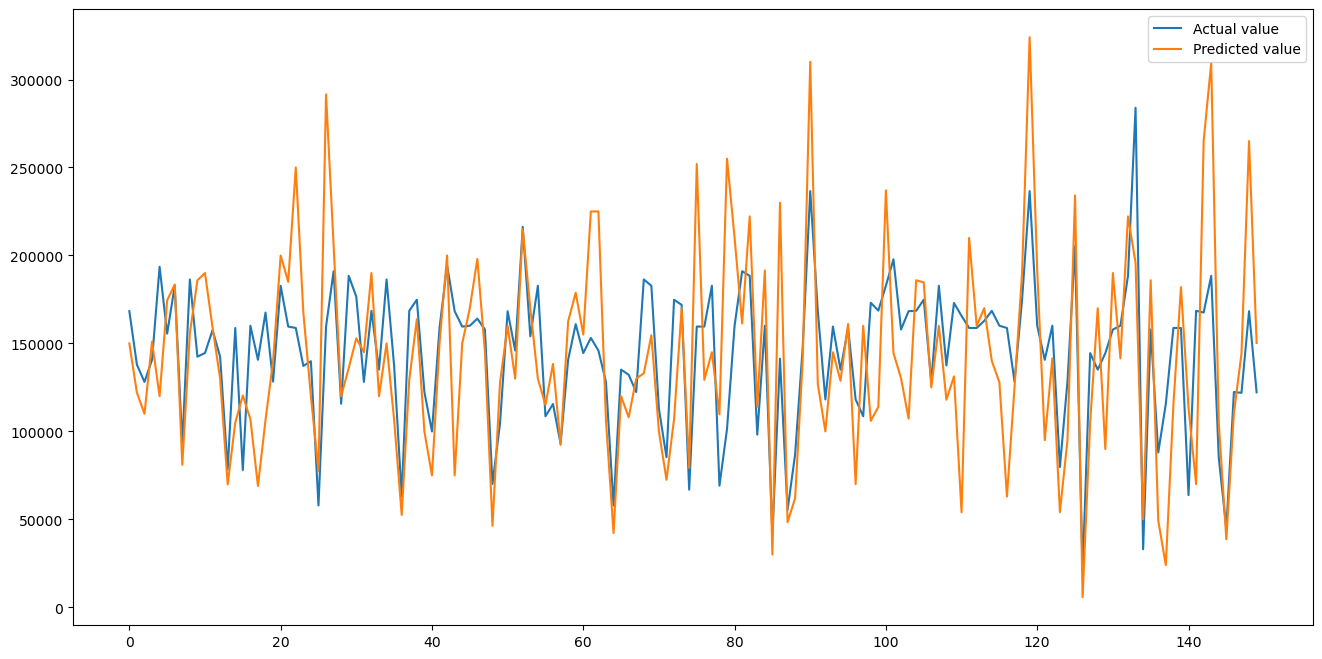

In [22]:
#creates a plot comparing predictions versus actuals.
test = pd.DataFrame({'Predicted value':fm_predictions, 'Actual value':val_y})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:150])
plt.legend(['Actual value','Predicted value'])